# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: First PCA dimension would be the feature with maximum variance. ICA dimensions will be independent vectors without any correlation with each other.

###PCA

In [2]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The variance drops off rapidly after the first 2. I would choose 2 dimensions for PCA on this dataset.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The first PCA component seems to coorelate with Frozen and the second PCA component seems to correlate with Detergents_Paper. The two major PCA components can be used to group customers more easily by observing their spending habits in these two categories.

###ICA

In [3]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA()
ica.fit_transform(data)

# Print the independent components
print ica.components_

[[  1.53432284e-07   9.84635179e-06  -5.80691047e-06  -3.64394902e-07
    3.30652672e-06  -6.05894302e-06]
 [ -3.86388314e-07  -2.19523705e-07  -6.01417596e-07  -5.22078338e-07
    5.10747436e-07   1.80927964e-05]
 [ -3.00804226e-07   2.29746317e-06   1.20850950e-05  -1.46130896e-06
   -2.82112786e-05  -5.73375031e-06]
 [  3.97580472e-06  -8.58109044e-07  -6.19042791e-07  -6.77889907e-07
    2.04983963e-06  -1.04624014e-06]
 [ -2.11149427e-07   1.89283541e-06  -6.38111607e-06  -4.17005561e-07
    7.02879722e-07   1.43248324e-06]
 [ -8.65256656e-07  -1.40267540e-07   7.74306794e-07   1.11461024e-05
   -5.56089321e-07  -5.95243954e-06]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: Each vector in ICA decomposition represents a type of customer. The first vector represents a customer that mostly buys fresh, and then detergents, delicatessen, milk, possibly a farmer's market store shopper. The second vector represents a customer that mostly buys fresh and detergents, possibly shopping at a small grocery store. The third vector represents a shopper who mostly buys frozen and then deli and grocery, possibly a deli/grocery store shopper. The fourth vector represents a customer that mostly buys milk, possibly a convinience store shopper. The fifth vector is a shopper that mostly buys frozen, grocery and some fresh and milk, possibly a chain grocery store shopper. The sixth vector represents a shopper that mostly buys deli and some fresh and detergents, possibly a small deli/grocery store shopper. These components can be used to group shoppers into different categories.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: In K-Means clustering we can pick the number of clusters we want and the algorithm will create exactly that many clusters. So each feature is assigned to exactly one cluster. But in Gaussian Mixture Model, each feature is assigned to one or many clusters with a certain probility. K Means clustering could be thought of as special case of Gaussian Mixed Model clustering, where the probability of a feature being in K clusters is 1 for a particular cluster and 0 for others. GMM is more complex and tends to be slower than K-Means algorithm, because it maintains partial membership information for each data point and it needs to update the estimate for covariance matrix on each iteration. GMM generally tends to be more accurate compared to K-Means algorithm except when K is very high and the feature distribution is non-gaussian. Both K-Means and GMM work well with large number of samples, producing many clusters. K-Meas is useful when smaller number of clusters with even cluster size is preferred, where as GMM is preferred when density estimation is important. In the current dataset since there are two major PCA dimensions, we can expect a good cluster distribution for 2 clusters and since shoppers are chosen at random, gaussian distribution can be assumed. This makes the dataset ideal for K-Means clustering.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [4]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [31]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [32]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters2 = KMeans(init='k-means++', n_clusters=2, n_init=10)
clusters3 = KMeans(init='k-means++', n_clusters=3, n_init=10)
clusters2.fit(reduced_data)
clusters3.fit(reduced_data)
print clusters2
print clusters3

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [27]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z2 = clusters2.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = clusters3.predict(np.c_[xx.ravel(), yy.ravel()])

In [33]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroids2 = clusters2.cluster_centers_
centroids3 = clusters3.cluster_centers_
print "Centeroids for K-Means with 2 clusters"
print centroids2
print "Inverse Transform for K-Means with 2 clusters"
print pca.inverse_transform(centroids2)
print "Centeroids for K-Means with 3 clusters"
print centroids3
print "Inverse Transform for K-Means with 3 clusters"
print pca.inverse_transform(centroids3)

Centeroids for K-Means with 2 clusters
[[  4175.31101293   -211.15109304]
 [-24088.33276689   1218.17938291]]
Inverse Transform for K-Means with 2 clusters
[[  7946.3089179    5181.37253392   7532.87951788   2439.71562313
    2833.80233713   1228.45976949]
 [ 35388.69470442   9343.72768891  10365.11047376   6719.33294348
    3156.6326704    3234.93209907]]
Centeroids for K-Means with 3 clusters
[[  1341.31124554  25261.39189714]
 [-23978.86566553  -4445.56611772]
 [  4165.1217824   -3105.15811456]]
Inverse Transform for K-Means with 3 clusters
[[  7896.19789901  18663.60082354  27183.75398875   2394.58291695
   12120.22381513   2875.42121485]
 [ 35908.284778     6409.08986458   6027.8378528    6808.69891192
    1088.15113313   2904.19473686]
 [  8276.37635401   3689.87223746   5320.73032038   2495.4539104
    1776.40278857   1063.96606028]]


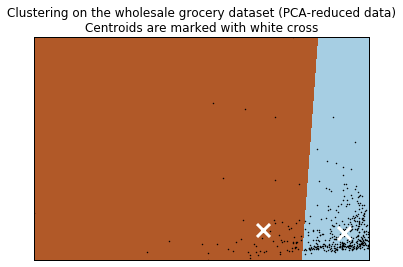

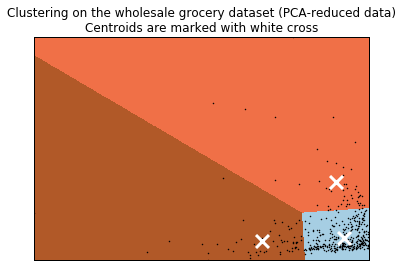

In [29]:
# Put the result into a color plot
Z2 = Z2.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z2, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Z3 = Z3.reshape(xx.shape)
plt.figure(2)
plt.clf()
plt.imshow(Z3, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids3[:, 0], centroids3[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: The central objects in each cluster represent a type of customer. For example in K-Means clustering with 2 clusters, the left cluster represents customers who shop at farmers market stores and the right cluster represents customers who shop at chain grocery stores. In case of K-Means clustering with 3 clusters the left bottom cluster represents customers who shop at farmer's market stores. The top cluster represents customers who shop at deli grocery stores and the bottom right cluster represents customes who shop at chain grocery stores.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: K-Means clustering helped divide the customers into 2 major groups. 

**9)** How would you use that technique to help the company design new experiments?

Answer: Since K-Means clustering helped identify the 2 major types of customers, I would use this information to design experiments for the company where 2 different stores could be arranged differently, with one having fresh, milk and deli at the front and frozen, detergents and grocery at the back and the other having frozen, detergents and grocery at the front and fresh, milk and deli at the back. There can also be other stores with a different arrangement of items. The results of the experiment would help suggest the most optimal way to arrange items at stores to generate most revenue. Also this will help decide what type of items should be sold more to what type of stores.

**10)** How would you use that data to help you predict future customer needs?

Answer: Knowing different types of customers and their spending habbits, I would use linear regression to predict their future demand for specific types of items.